In [130]:
import os
import shutil
import random
import numpy as np
import pickle
from glob import glob
from matplotlib import pyplot as plt

In [131]:
def background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)

In [132]:
source_dir = "data/3_09_2024_lab_pc_raw_data/walking"
dest_dir = "data/background_removal_entire_field_raw_3_class/walking"
train_dir = f"{dest_dir}/train"
test_dir = f"{dest_dir}/test"

In [133]:
bg_noise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(os.getcwd(), bg_noise_folder))
#loop through files in bg path
for f in bg_files[:1]:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        bg_noise.append(data)
bg_noise = np.vstack(bg_noise)

In [134]:
bg_noise.shape

(500, 5)

Text(0.5, 0, 'Z')

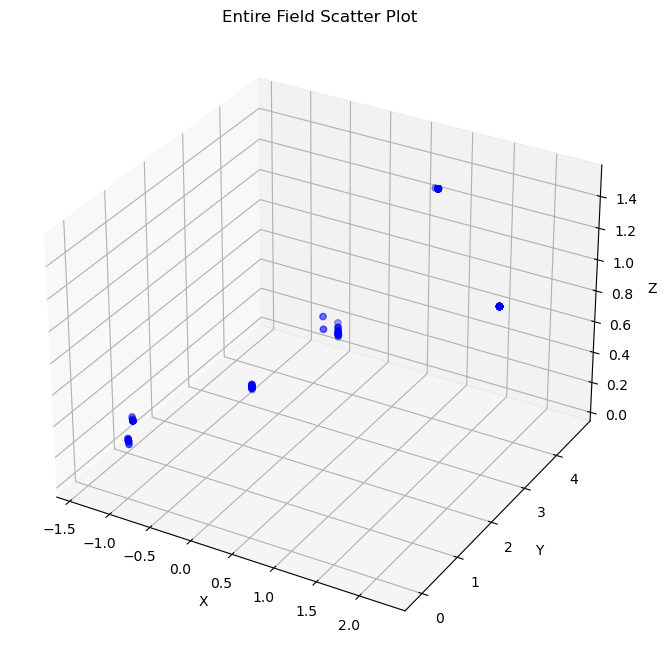

In [135]:
# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(bg_noise[:, 0], bg_noise[:, 1], bg_noise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [136]:
source_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
for file in source_files:
    dest_path = os.path.join(dest_dir, file)
    file_path = os.path.join(source_dir, file)
    
    # Print the paths for debugging
    print(f"Source file path: {file_path}")
    print(f"Destination file path: {dest_path}")
    
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue  # Skip this file
    
    try:
        with open(file_path, 'rb') as file_in:
            data = pickle.load(file_in)
            data = np.vstack(data)
        filtered_points, points_removed = background_subtraction(bg_noise, data, threshold = 0.01)
        
        with open(dest_path, 'wb') as file_out:
            pickle.dump(filtered_points, file_out)
    except Exception as e:
        print(f"An error has occurred while processing file: {e}")


Source file path: data/3_09_2024_lab_pc_raw_data/walking/katie_walking82.pkl
Destination file path: data/background_removal_entire_field_raw_3_class/walking/katie_walking82.pkl
points removed: 128
Source file path: data/3_09_2024_lab_pc_raw_data/walking/katie_walking55.pkl
Destination file path: data/background_removal_entire_field_raw_3_class/walking/katie_walking55.pkl
points removed: 127
Source file path: data/3_09_2024_lab_pc_raw_data/walking/katie_walking41.pkl
Destination file path: data/background_removal_entire_field_raw_3_class/walking/katie_walking41.pkl
points removed: 121
Source file path: data/3_09_2024_lab_pc_raw_data/walking/katie_walking69.pkl
Destination file path: data/background_removal_entire_field_raw_3_class/walking/katie_walking69.pkl
points removed: 134
Source file path: data/3_09_2024_lab_pc_raw_data/walking/katie_walking68.pkl
Destination file path: data/background_removal_entire_field_raw_3_class/walking/katie_walking68.pkl
points removed: 150
Source file pat

In [137]:
files = [f for f in os.listdir(dest_dir) if os.path.isfile(os.path.join(dest_dir, f))]

In [138]:
len(files)

90

In [139]:
random.seed(42)
random.shuffle(files)

train_ratio = 0.8
split_index = int(train_ratio * len(files))
train_files = files[:split_index]
test_files = files[split_index:]
print(split_index)

72


In [140]:
for file in train_files:
    shutil.move(os.path.join(dest_dir, file), os.path.join(train_dir, file))

for file in test_files:
    shutil.move(os.path.join(dest_dir, file), os.path.join(test_dir, file))